In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
filename = '/Users/ola/dev/eit/data/signDatabasePublicFramesOnly/vid6/frameAnnotations-MVI_0071.MOV_annotations/stop_1323896588.avi_image29.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

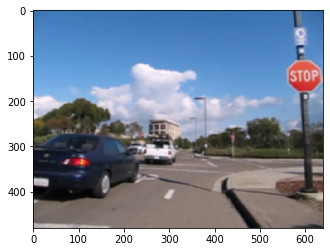

In [4]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
img_blurred = cv2.filter2D(img,-1,kernel)
RGB_blurred = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_blurred)

In [5]:
rgb = RGB_img/255.0 # Convert to floating-point to prevent overflow
# Compute distance in RGB space to strong red
difference = rgb - np.array([1.0,0.0,0.0])
distance = np.linalg.norm(difference, axis=2) # Euclidean length (L2 norm)of the third dimension (rgb difference)
thresholded = distance < 0.7 # Isolate pixels that are sufficiently close to strong red

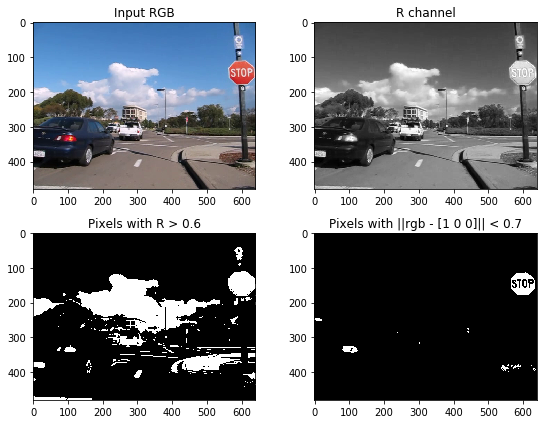

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(rgb)
plt.title('Input RGB')
plt.subplot(222)
plt.imshow(rgb[:,:,0], cmap='gray')
plt.title('R channel')
plt.subplot(223)
plt.imshow(rgb[:,:,0] > 0.6, cmap='gray')
plt.title('Pixels with R > 0.6')
plt.subplot(224)
plt.imshow(thresholded, cmap='gray')
plt.title('Pixels with ||rgb - [1 0 0]|| < 0.7')
plt.tight_layout()
plt.show()

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

low_red = np.array([161, 155, 84])
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv, low_red, high_red)

low_red2 = np.array([0, 155, 84])
high_red2 = np.array([20, 255, 255])
red_mask2 = cv2.inRange(hsv, low_red2, high_red2)

low_white = np.array([0, 160, 0])
high_white = np.array([255, 255, 255])
white_mask = cv2.inRange(hls, low_white, high_white)

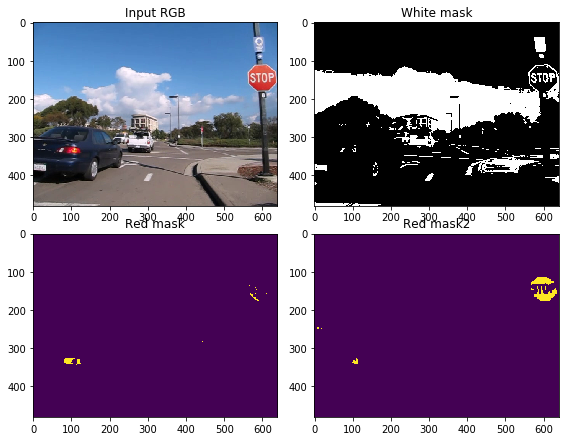

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(rgb)
plt.title('Input RGB')
plt.subplot(222)
rgb_white = cv2.cvtColor(white_mask, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_white)
plt.title('White mask')
plt.tight_layout()
plt.subplot(223)
plt.imshow(red_mask)
plt.title('Red mask')
plt.subplot(224)
plt.imshow(red_mask2)
plt.title('Red mask2')
plt.show()

In [9]:
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
# do the laplacian filtering as it is
# well, we need to convert everything in something more deeper then CV_8U
# because the kernel has some negative values,
# and we can expect in general to have a Laplacian image with negative values
# BUT a 8bits unsigned int (the one we are working with) can contain values from 0 to 255
# so the possible negative number will be truncated
#img[np.all(img == 255, axis=2)] = 0
imgLaplacian = cv2.filter2D(img, cv2.CV_32F, kernel)
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)

img_laplacian = cv2.cvtColor()